# Phylogenetic tree
The aim of this notebook is to create a phylogenic tree based on the results obtained in [[measure.ipynb]](./measure.ipynb). The tree will be created using the biopython library. On top of it, the tree will be visualized exploring different options.

**Requirements**: Python 3.9. or less is required to make this work!

In [5]:
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
from scipy.spatial.distance import squareform
import pandas as pd
import numpy as np
from io import StringIO
from Bio import Phylo
import metric as me

In [14]:
output = '../Data/Results/Tree/'

matrix = pd.read_excel(r'../../Data/Intermediate/metric/metric_50_m_n.xlsx', index_col=0)
species = matrix.columns.to_list() #['Aadvark', 'Alligator M', 'Alligator S', 'Anolis', 'Chelonia', 'Chrysemys', 'Croco', 'Danio', 'Devil', 'Dog', 'Fugu', 'Gecko', 'Gorilla', 'Human', 'KCobra', 'Koala', 'Monodelphis', 'Mouse', 'Orca', 'Ostrich', 'Papio', 'Pelodiscus', 'Pigeon', 'Platypus', 'Pogona', 'Python', 'Thamnophis', 'Xenopus', 'Xlaevis', 'Xtropicalis']
matrix = matrix.to_numpy()

# Convert similarity metric to distance -> parameter = 1/4
lower_triangular_list_of_lists = [[me.measure_to_dist(matrix[i][j], 1/4) if matrix[i][j] > 0 else matrix[i][j] for j in range(i+1)] for i in range(len(matrix))]


In [15]:
# Create a distance matrix object from your similarity matrix
matrix = DistanceMatrix(species, lower_triangular_list_of_lists)

# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

# Build the tree using the neighbor joining method
#tree = constructor.nj(matrix)
tree = constructor.upgma(matrix)

#from Bio.Phylo.TreeConstruction import BioNJ
#tree = BioNJ(matrix).build_tree()

# Print the newick format of the tree
print(tree.format("newick"))

((Fugu:0.72612,Danio:0.72612)Inner26:0.43803,(((Xlaevis:0.00000,Pigeon:0.00000)Inner1:0.79756,(Dog:0.00000,Devil:0.00000)Inner2:0.79756)Inner27:1.09967,(KCobra:0.68909,(Thamnophis:0.67029,((Xtropicalis:0.34307,Xenopus:0.34307)Inner20:0.23436,((Platypus:0.38841,(Python:0.28514,((Gecko:0.16548,(Pogona:0.08958,Anolis:0.08958)Inner12:0.07590)Inner17:0.03804,((Chrysemys:0.09210,Chelonia:0.09210)Inner13:0.04013,(Ostrich:0.10706,(Pelodiscus:0.07065,('Alligator S':0.06108,(Croco:0.00954,'Alligator M':0.00954)Inner6:0.05154)Inner10:0.00957)Inner11:0.03641)Inner14:0.02517)Inner15:0.09646)Inner18:0.11966)Inner19:0.10327)Inner21:0.05873,(Mouse:0.16068,(((Monodelphis:0.02523,Koala:0.02523)Inner7:0.02271,(Papio:0.00036,(Human:0.00008,Gorilla:0.00008)Inner3:0.00028)Inner4:0.04758)Inner8:0.03511,(Orca:0.00555,Aadvark:0.00555)Inner5:0.05478)Inner9:0.13546)Inner16:0.28646)Inner22:0.18902)Inner23:0.28188)Inner24:0.01880)Inner25:0.41058)Inner28:0.47506)Inner29:0.00000;



## Visualize

In [16]:
Phylo.draw_ascii(tree)

             __________________ Fugu
  __________|
 |          |__________________ Danio
 |
 |                                                              , Xlaevis
 |                                         _____________________|
_|                                        |                     | Pigeon
 |            ____________________________|
 |           |                            |                     , Dog
 |           |                            |_____________________|
 |           |                                                  | Devil
 |___________|
             |           _________________ KCobra
             |          |
             |          | ________________ Thamnophis
             |          ||
             |__________||             ________ Xtropicalis
                        ||       _____|
                        ||      |     |________ Xenopus
                        ||      |
                        ||      |       _________ Platypus
                      

In [17]:
tree.format("newick").replace('Inner', '')

"((Fugu:0.72612,Danio:0.72612)26:0.43803,(((Xlaevis:0.00000,Pigeon:0.00000)1:0.79756,(Dog:0.00000,Devil:0.00000)2:0.79756)27:1.09967,(KCobra:0.68909,(Thamnophis:0.67029,((Xtropicalis:0.34307,Xenopus:0.34307)20:0.23436,((Platypus:0.38841,(Python:0.28514,((Gecko:0.16548,(Pogona:0.08958,Anolis:0.08958)12:0.07590)17:0.03804,((Chrysemys:0.09210,Chelonia:0.09210)13:0.04013,(Ostrich:0.10706,(Pelodiscus:0.07065,('Alligator S':0.06108,(Croco:0.00954,'Alligator M':0.00954)6:0.05154)10:0.00957)11:0.03641)14:0.02517)15:0.09646)18:0.11966)19:0.10327)21:0.05873,(Mouse:0.16068,(((Monodelphis:0.02523,Koala:0.02523)7:0.02271,(Papio:0.00036,(Human:0.00008,Gorilla:0.00008)3:0.00028)4:0.04758)8:0.03511,(Orca:0.00555,Aadvark:0.00555)5:0.05478)9:0.13546)16:0.28646)22:0.18902)23:0.28188)24:0.01880)25:0.41058)28:0.47506)29:0.00000;\n"

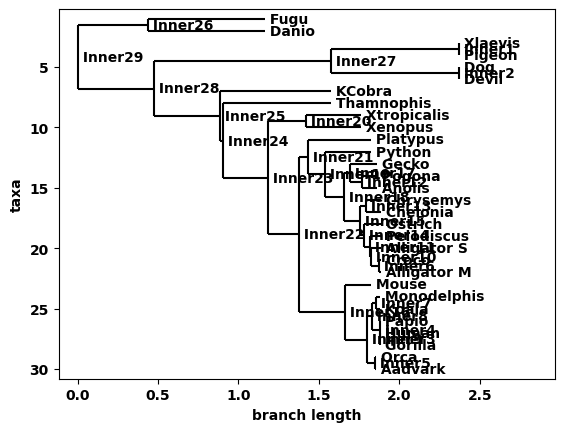

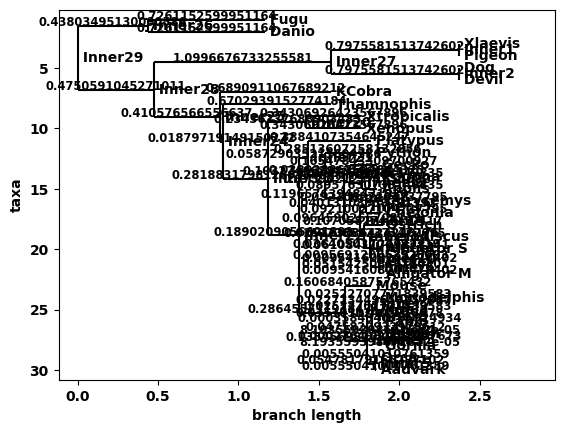

In [18]:
from Bio import Phylo 
Phylo.draw(tree)
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

# No option to delete Inner names
# Idea: replace them by ''


In [20]:
from ete3 import Tree, TreeStyle, faces

t = Tree(tree.format("newick"), format=1, quoted_node_names=True) #tree_string

'''
# Draws a circular tree using a semi-circumference: 
ts = TreeStyle()
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180

ts = TreeStyle()
ts.rotation = 90

# Add title
title_face = faces.TextFace("My Phylogenetic Tree")
t.add_face(title_face, column=0, position="branch-top")

# Add a description to the entire tree in the bottom-left corner
desc_face = faces.TextFace("This is a description of the entire tree")
desc_face.margin_top = 5
desc_face.margin_left = 5
desc_face.margin_right = 5
desc_face.border.width = 1
desc_face.border.color = "gray"

t.add_face(desc_face, column=0, position="branch-bottom")

# Add a blank face to the bottom-right corner to align the description
# with the bottom-left corner
blank_face = faces.TextFace("")
blank_face.margin_top = 5
blank_face.margin_right = 5

t.add_face(blank_face, column=1, position="branch-bottom")
'''


t.show() #tree_style=ts


In [ ]:
path = output + 'rost_presentation_tree.png'
t.render(path, w=183, units="mm")


{'nodes': [[1.2861561941112072,
   147.0815064871197,
   11.575405747000865,
   157.37075604000935,
   0,
   None],
  [94.49643488715463,
   38.584685823336216,
   104.78568444004429,
   48.87393537622587,
   1,
   None],
  [243.93522934603575,
   18.0061867175569,
   254.2244788989254,
   28.295436270446558,
   2,
   None],
  [243.93522934603575,
   59.16318492911553,
   254.2244788989254,
   69.45243448200519,
   3,
   None],
  [101.7238358341121,
   255.5783271509032,
   112.01308538700175,
   265.86757670379285,
   4,
   None],
  [324.07096471740465,
   162.0556804580121,
   334.3602142702943,
   172.34493001090175,
   5,
   None],
  [487.4531975681475,
   120.89868224645348,
   497.7424471210372,
   131.18793179934312,
   6,
   None],
  [495.17013473281474,
   100.32018314067416,
   505.4593842857044,
   110.60943269356382,
   7,
   None],
  [495.17013473281474,
   141.47718135223278,
   505.4593842857044,
   151.76643090512243,
   8,
   None],
  [487.4531975681475,
   203.2126786

In [ ]:
from ete3 import Tree, TreeStyle

# Create a tree object
tree = Tree("(((A,B),C),D);")

# Create a tree style object and set the rotation angle to 90 degrees
ts = TreeStyle()
ts.rotation = 90

# Mirror the tree
tree.render("original.png", tree_style=ts)
tree.rotate(90)
tree.render("mirrored.png", tree_style=ts)



AttributeError: 'TreeNode' object has no attribute 'rotate'